# Problem 1

In [76]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (10.0, 8.0)
np.random.seed(100)
A = np.array([[0.990, 0.005, 0.005], [0.005, 0.990, 0.005], [0.005, 0.005, 0.990]])
pi = np.array([1/3, 1/3, 1/3])
Q = np.array([-1, 0, 1])
T = 1000
scale=0.005

In [77]:
def Yt(xt):
    return np.random.normal(loc=xt, scale=scale)

def run_hmm():
    starting_state = np.random.choice(Q,p=pi)
    prev_state = starting_state
    xt = [prev_state]
    yt = [Yt(xt)]
    for t in range(1,T):
        next_state = np.random.choice(Q, p=A[xt[t-1]+1,:])
        xt.append(next_state)
        yt.append(Yt(next_state)) 
    return {'xt': xt, 'yt': yt}

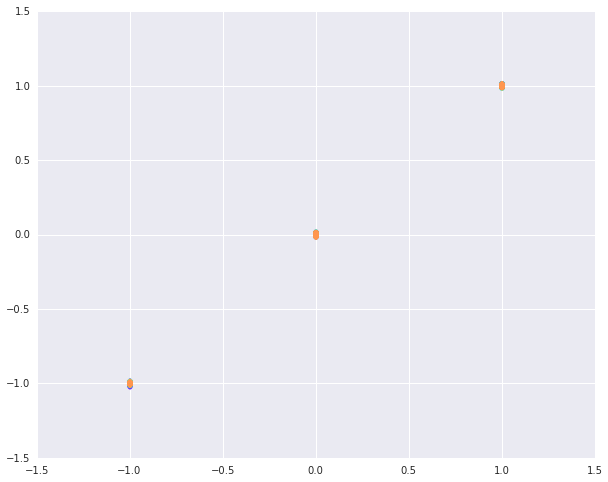

In [78]:
fig = plt.figure()
#ax1 = fig.add_subplot(3,2,1) 
colors = cm.rainbow(np.linspace(0, 1, 6))
for i in range(0,5):
    d = run_hmm()
    #ax = fig.add_subplot(3,2,i)
    xt = d['xt']
    yt = d['yt']
    plt.scatter(xt, yt, color=colors[i])

In [102]:
def f(m, yt):
    p = norm.pdf(yt, m, scale=scale)
    if p>1:
        raise RuntimeError('error',p)
    return p

In [103]:
def viterbi(yt):
    delta = [{} for t in range(0,T)]
    path = {}
    for q in Q:
        delta[0][q] = pi[q+1]*f(Q[q+1], yt[0]) 
        path[q] = [q]
    for t in range(1,T):
        tempath = {}
        for q in Q:
            (delta[t][q], state) =  max((delta[t-1][x]*f(Q[x+1], yt[t])*A[x+1,q+1],x) for x in Q)
            tempath[q] = path[state]+[q]
        path = tempath
    print(delta)
    (p, state) = max((delta[T-1][q], q) for q in Q)
    print(p)
    return path[state]

In [104]:
xtp = viterbi(yt)
plt.scatter(xt,xtp)

RuntimeError: ('error', array([ 51.86260657]))

# Problem 2

In [95]:
norm.pdf(yt[2],-1,1)

0.23931840504233798

## The above problem of course has a grave error. After Dinner.